# Predictive Modeling for Customer Churn Analysis  

## 📌 Context  
Customer churn (the loss of clients) is a critical metric for telecom companies, directly impacting revenue. This project analyzes **Telco customer data** to:  
- Identify patterns leading to churn  
- Build predictive models to flag at-risk customers  
- Recommend retention strategies  

**Important Questions to Consider**:  
1. Which factors most strongly predict churn?  
2. Can we reliably forecast churn before a client leaves?  
3. What interventions might reduce churn based on model insights?  

## 🛠️ Technical Approach  
I’ll implement a complete machine learning pipeline:  

1. **Exploratory Data Analysis**  
   - Visualize distributions of tenure, charges, and service usage  
   - Identify correlations with churn status
             
2. **Model Benchmarking**  
   - Compare 5 algorithms:  
     - Logistic Regression  
     - Random Forest
     - AdaBoost  
     - Decision Tree  
     - KNN
       
3. **Performance Evaluation**  
   - Primary metric: **Accuracy**     

## 💡 Expected Value  
By deploying the best model, we aim to:  
- **Reduce churn rate**   
- Save **$[X] annually**

*Data Source*: [Kaggle Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)  

## 1 - Library Import

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay

## 2 - Data Loading

In [18]:
# loading data
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

## 3 - Initial exploration

In [14]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [130]:
df.shape

(7043, 21)

In [132]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [210]:
# Checking if there are null values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [264]:
# Duplicates check
df.duplicated().sum()

0

In [212]:
# Observation of data to check if there are extrange values
for columna in df.columns:
    print(f"Valores únicos y frecuencia en la columna '{columna}':")
    print(df[columna].value_counts())
    print("\n")  

Valores únicos y frecuencia en la columna 'customerID':
customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64


Valores únicos y frecuencia en la columna 'gender':
gender
Male      3555
Female    3488
Name: count, dtype: int64


Valores únicos y frecuencia en la columna 'SeniorCitizen':
SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


Valores únicos y frecuencia en la columna 'Partner':
Partner
No     3641
Yes    3402
Name: count, dtype: int64


Valores únicos y frecuencia en la columna 'Dependents':
Dependents
No     4933
Yes    2110
Name: count, dtype: int64


Valores únicos y frecuencia en la columna 'tenure':
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64


Valores únicos y frecuencia en la co

## 4 - Exploratory Data Visualization

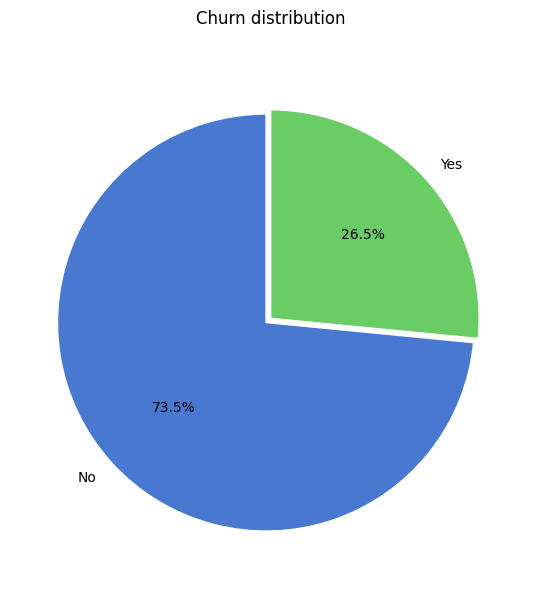

In [142]:
plt.figure(figsize=(6,6))
df['Churn'].value_counts().plot.pie(autopct='%1.1f%%', 
                                   startangle=90,
                                   colors=['#4878cf', '#6acc65'],  
                                   explode=[0.03, 0],  
                                   wedgeprops={'linewidth':1, 'edgecolor':'white'})
plt.title('Churn distribution\n', fontsize=12, pad=10)
plt.ylabel('')
plt.tight_layout()
plt.show()

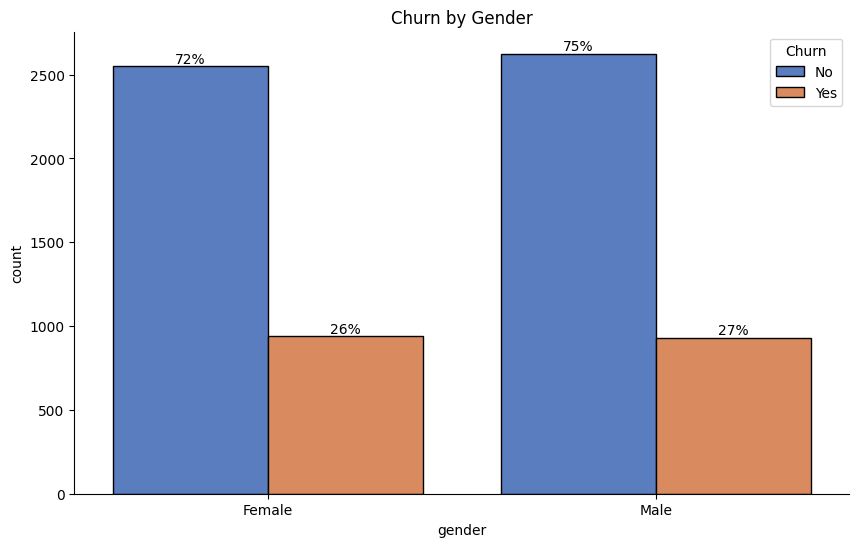

In [140]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="gender", data=df, hue="Churn", palette='muted', edgecolor= "black")

total_counts = df['gender'].value_counts()

for p in ax.patches:
    height = p.get_height()
    if height > 0:  
        gender_idx = int(p.get_x() + 0.5)  
        percentage = f'{100 * height / total_counts.iloc[gender_idx]:.0f}%'
        ax.annotate(percentage, (p.get_x()+p.get_width()/2, height),
                    ha='center', va='bottom', fontsize=10)

plt.title("Churn by Gender")
sns.despine()
plt.show()

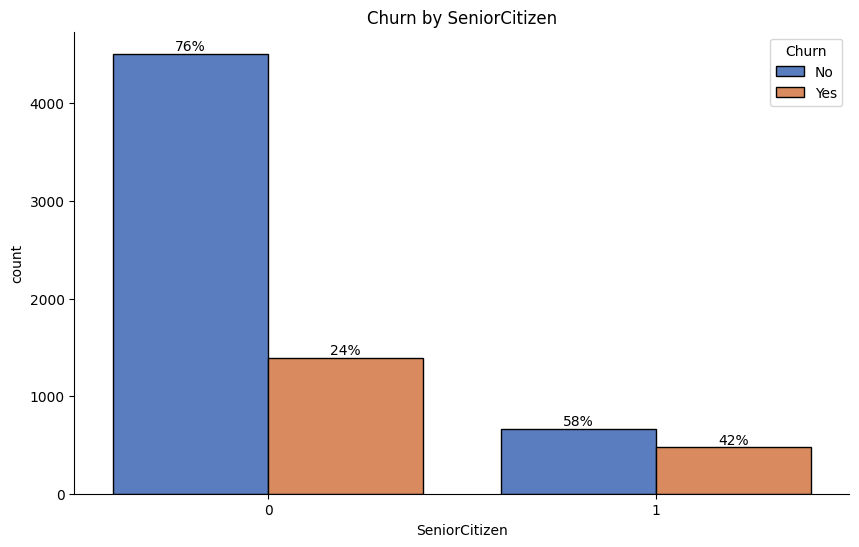

In [144]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="SeniorCitizen", data=df, hue="Churn", palette='muted', edgecolor= "black")

total_counts = df['SeniorCitizen'].value_counts()

for p in ax.patches:
    height = p.get_height()
    if height > 0:  
        senior_idx = int(p.get_x() + 0.5)  
        percentage = f'{100 * height / total_counts.iloc[senior_idx]:.0f}%'
        ax.annotate(percentage, (p.get_x()+p.get_width()/2, height),
                    ha='center', va='bottom', fontsize=10)

plt.title("Churn by SeniorCitizen")
sns.despine()
plt.show()

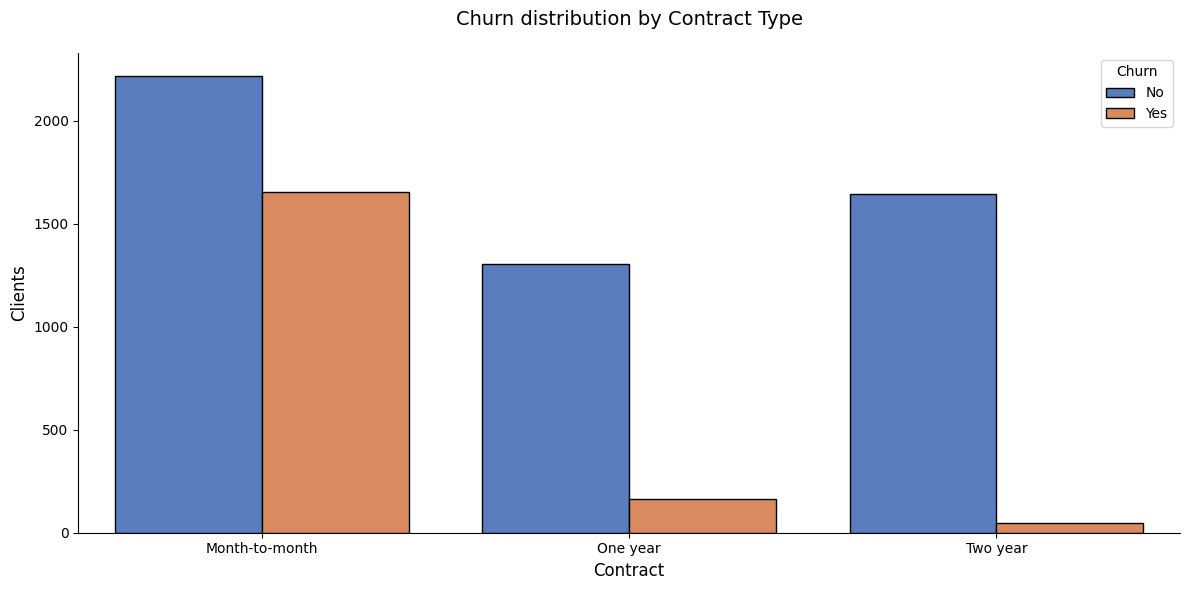

In [146]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x="Contract", 
                  data=df, 
                  hue="Churn", 
                  palette='muted', 
                  edgecolor="black")

plt.title("Churn distribution by Contract Type", pad=20, fontsize=14)
plt.xlabel("Contract", fontsize=12)
plt.ylabel("Clients", fontsize=12)

sns.despine()
plt.tight_layout()
plt.show()

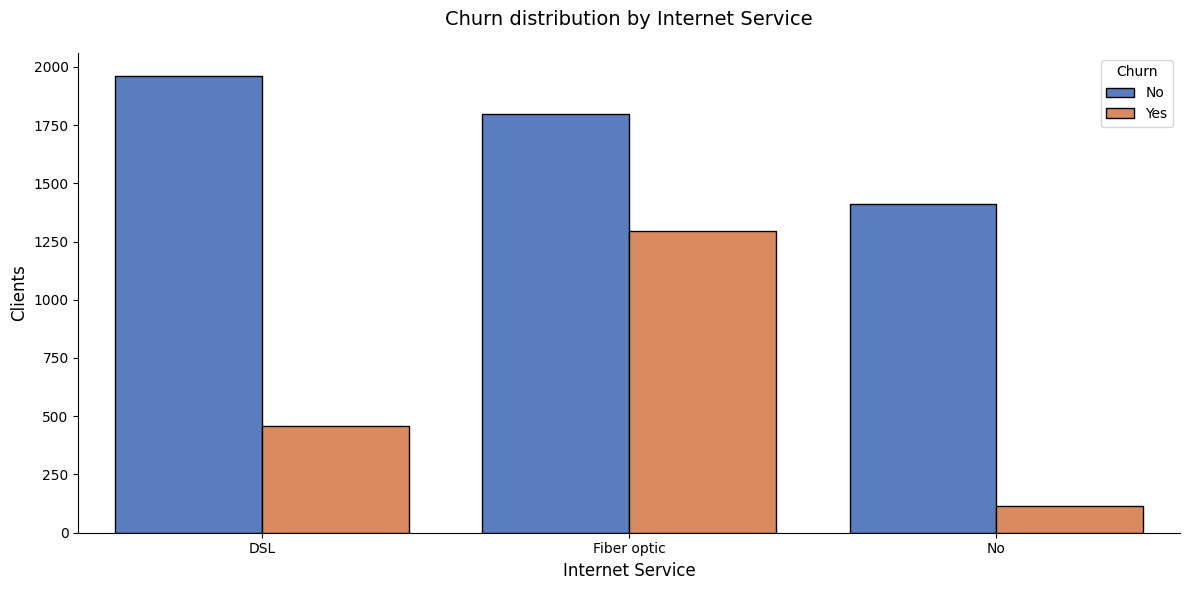

In [150]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x="InternetService", 
                  data=df, 
                  hue="Churn", 
                  palette='muted', 
                  edgecolor="black")

plt.title("Churn distribution by Internet Service", pad=20, fontsize=14)
plt.xlabel("Internet Service", fontsize=12)
plt.ylabel("Clients", fontsize=12)

sns.despine()
plt.tight_layout()
plt.show()

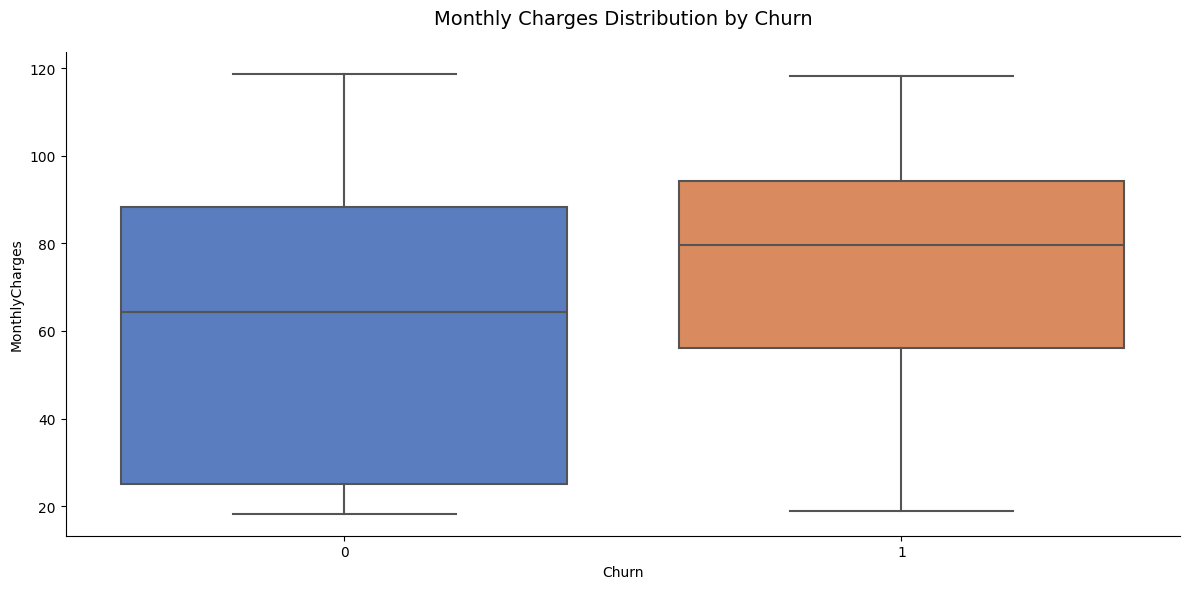

In [250]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, 
            palette='muted')  
plt.title("Monthly Charges Distribution by Churn", pad=20, fontsize=14)
sns.despine()
plt.tight_layout()
plt.show()

## 5 - Feature Encoding and Data Splitting  

In [20]:
# 5.1 - Encoding Categorical Features  
le = LabelEncoder()

for column in df.columns:
    if df[column].dtype == "object":
        df[column] = le.fit_transform(df[column])
        print(f"Column :{column}, Unique Values : {df[column].unique()}")

Column :customerID, Unique Values : [5375 3962 2564 ... 3367 5934 2226]
Column :gender, Unique Values : [0 1]
Column :Partner, Unique Values : [1 0]
Column :Dependents, Unique Values : [0 1]
Column :PhoneService, Unique Values : [0 1]
Column :MultipleLines, Unique Values : [1 0 2]
Column :InternetService, Unique Values : [0 1 2]
Column :OnlineSecurity, Unique Values : [0 2 1]
Column :OnlineBackup, Unique Values : [2 0 1]
Column :DeviceProtection, Unique Values : [0 2 1]
Column :TechSupport, Unique Values : [0 2 1]
Column :StreamingTV, Unique Values : [0 2 1]
Column :StreamingMovies, Unique Values : [0 2 1]
Column :Contract, Unique Values : [0 1 2]
Column :PaperlessBilling, Unique Values : [1 0]
Column :PaymentMethod, Unique Values : [2 3 0 1]
Column :TotalCharges, Unique Values : [2505 1466  157 ... 2994 2660 5407]
Column :Churn, Unique Values : [0 1]


In [22]:
# 5.2 - Creating Training/Test Sets
X = df.drop("Churn", axis=1)
y = df["Churn"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 45)

In [24]:
# 5.3 - Standardizing Features
scaler = StandardScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## 6 - Machine Learning Models

### Random Forest

In [26]:
random = RandomForestClassifier()
rf_model = RandomForestClassifier(n_estimators=100, random_state=45)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=45)

In [77]:
y_pred = rf_model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.4f}")

Random Forest Accuracy: 0.8024


### Decision Tree

In [75]:
dec_tree = DecisionTreeClassifier(
    max_depth=5,             
    min_samples_split=20,      
    random_state=45)

dec_tree.fit(X_train, y_train)

dec_pred = dec_tree.predict(X_test)
print(f"Decision Tree Accuracy: {round(accuracy_score(y_test, dec_pred),4)}")

Decision Tree Accuracy: 0.7967


### Logistic Regression

In [55]:
logreg = LogisticRegression(random_state=45)
logreg.fit(scaled_X_train, y_train)

logreg_pred = logreg.predict(scaled_X_test)
print(f"Logistic Regression Accuracy: {round(accuracy_score(y_test, logreg_pred),4)}")

Logistic Regression Accuracy: 0.8058


### KNN

In [34]:
knn = KNeighborsClassifier(n_neighbors = 30) 
knn.fit(X_train,y_train)

knn_predict = knn.predict(X_test)
print(f"KNN Accuracy : {round(accuracy_score(y_test, knn_predict), 4)}")

KNN Accuracy : 0.7405


### Ada Boost

Ada Boost Accuracy: 0.8149

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1307
           1       0.66      0.57      0.61       454

    accuracy                           0.81      1761
   macro avg       0.76      0.74      0.75      1761
weighted avg       0.81      0.81      0.81      1761



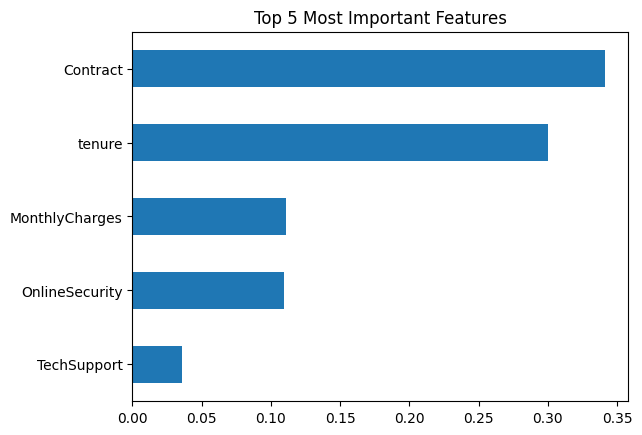

In [57]:
model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=100,
    learning_rate=0.5,
     algorithm='SAMME',
    random_state=45
)
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)
print(f"Ada Boost Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

#Important features plot
pd.Series(model.feature_importances_, index=X_train.columns).sort_values().tail(5).plot.barh()
plt.title("Top 5 Most Important Features")
plt.show()

## 7 - Results

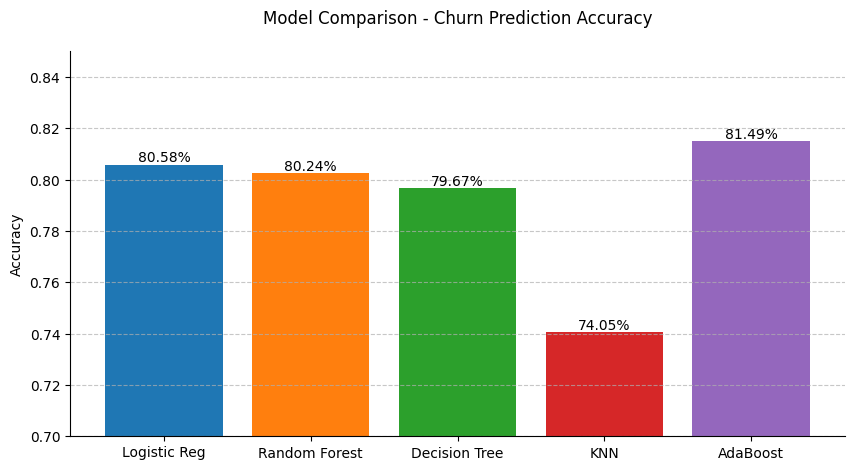

In [71]:
models = ['Logistic Reg', 'Random Forest', 'Decision Tree', 'KNN', 'AdaBoost']
accuracy = [0.8058, 0.8024, 0.7967, 0.7405, 0.8149]

plt.figure(figsize=(10, 5))
bars = plt.bar(models, accuracy, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

#Show %
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2%}', ha='center', va='bottom')

plt.title('Model Comparison - Churn Prediction Accuracy', pad=20)
plt.ylim(0.7, 0.85)
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.show()

### Model Performance Comparison (Churn Prediction Dataset)

| Algorithm               | Accuracy | Strengths                              | Limitations                       |
|-------------------------|----------|----------------------------------------|-----------------------------------|
| **AdaBoost**            | 81.49%   | - Effective at capturing non-linear patterns<br>- Reduces bias through iterative boosting | - Higher computational requirements<br>- Sensitive to noisy data |
| **Logistic Regression** | 80.58%   | - Fast training/prediction<br>- Interpretable coefficients<br>- Works well with linear relationships | - Assumes linear decision boundary<br>- Requires feature scaling |
| **Random Forest**       | 80.24%   | - Handles non-linear relationships well<br>- Robust to outliers and missing values | -Memory intensive with large trees |
| **Decision Tree**       | 79.62%   | - Fully interpretable rules<br>- Handles mixed data types | - Feature Importance Bias<br>- Poor Generalization |
| **k-NN**                | 74.05%   | - No assumptions about data distribution<br>- Simple to implement | - Sensitive to feature scaling<br>- Computationally expensive at runtime |

**Key Insights:**
- Ensemble methods (AdaBoost/Random Forest) achieved >80% accuracy
- Linear models performed surprisingly well (suggesting underlying linear patterns)
- Decision Trees provide maximum explainability with minimal accuracy sacrifice

**Recommendations:**
1. For production: **AdaBoost** (highest accuracy)
2. For rapid prototyping: **Logistic Regression**
